## Copyright 2023 Google LLC

In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# StyleAligned over SDXL

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "GPU-48d0547b-e505-7f76-7741-a012f5c16f7a"
from diffusers import StableDiffusionXLPipeline, DDIMScheduler
import torch
import mediapy
import sa_handler
from PIL import Image

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.2+cu118 with CUDA 1108 (you have 2.1.0)
    Python  3.10.13 (you have 3.10.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [2]:
# init models

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                              set_alpha_to_one=False)
pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    scheduler=scheduler
).to("cuda")

handler = sa_handler.Handler(pipeline)
sa_args = sa_handler.StyleAlignedArgs(share_group_norm=False,
                                      share_layer_norm=False,
                                      share_attention=True,
                                      adain_queries=True,
                                      adain_keys=True,
                                      adain_values=False,
                                     )

handler.register(sa_args, )

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
# run StyleAligned

sets_of_prompts = [
  "a matt black sculpture of gorilla face",
  "a matt black sculpture of dog face",
  "a matt black sculpture of an old woman with earrings",
  "a matt black sculpture of an old man with eyeglasses and beard",
  "a matt black sculpture of a house",
]
sets_of_prompts = [
  "a toy train. macro photo. 3d game asset",
  "a toy airplane. macro photo. 3d game asset",
  "a toy bicycle. macro photo. 3d game asset",
  "a toy car. macro photo. 3d game asset"
]

sets_of_prompts = [
    "a woman surrounded by blue decorations on a white background in flat cartoon illustration style",
    "a dog surrounded by blue decorations on a white background in flat cartoon illustration style",
    "an orange surrounded by blue decorations on a white background in flat cartoon illustration style",
    "an avocado surrounded by blue decorations on a white background in flat cartoon illustration style"
]

images = pipeline(sets_of_prompts, generator=torch.manual_seed(12345)).images
#mediapy.show_images(images)

  0%|          | 0/50 [00:00<?, ?it/s]

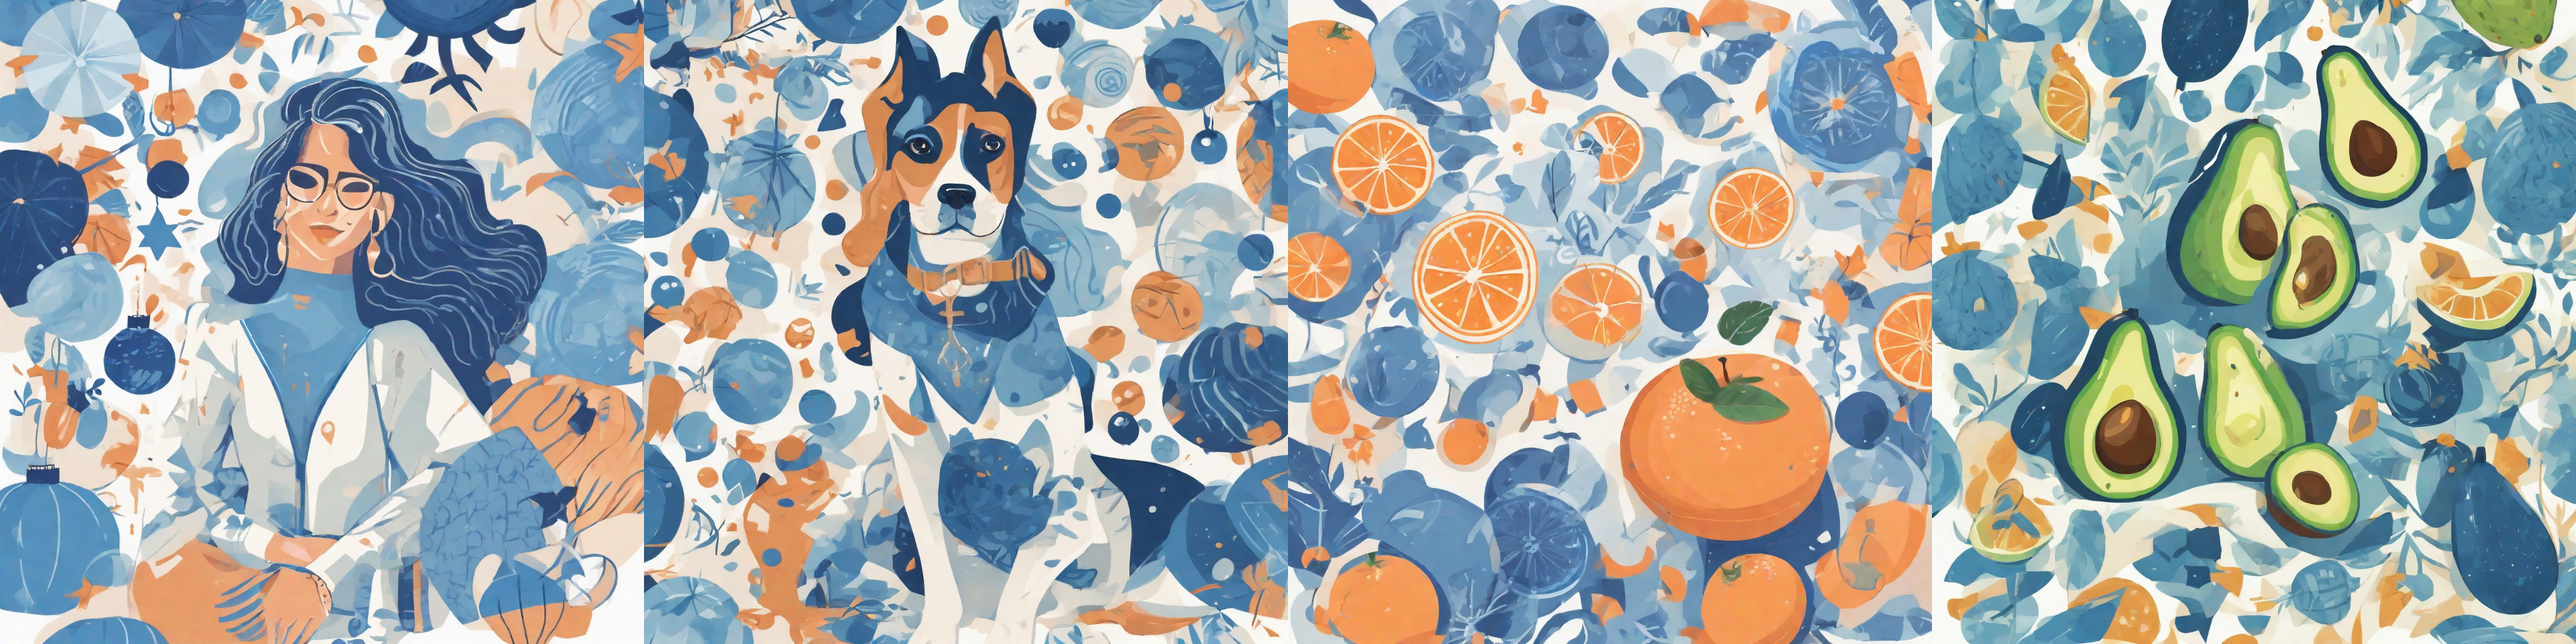

In [4]:
result_image = Image.new('RGB', (1024 * len(sets_of_prompts), 1024), color='white')

for i in range(len(sets_of_prompts)):
    result_image.paste(images[i], (i * 1024, 0))

result_image.show()